iris dl 2

In [21]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate, Activation

input = Input(shape=(4,))
dense1 = Dense(30, activation='relu')(input)
dense2 = Dense(20, activation='relu')(input)
dense3 = Dense(10, activation='relu')(input)
x = concatenate([dense1, dense2, dense3])
output = Dense(3, activation='softmax')(x)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 30)        │        150 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 20)        │        100 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 10)        │         50 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 60)        │          0 │ dense_20[0][0],   │
│ (Concatenate)       │                   │            │ dense_21[0][0],   │
│                     │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 3)         │        183 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 483 (1.89 KB)

 Trainable params: 483 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3000 - loss: 2.6687  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2677 - loss: 2.3746 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2907 - loss: 1.9732 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2917 - loss: 1.4478 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4845 - loss: 1.0787 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6215 - loss: 0.9083 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6385 - loss: 0.7663 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6864 - loss: 0.7249 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7177 - loss: 0.6952 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6614 - loss: 0.7380 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6833 - loss: 0.7049 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6739 - lo

[0.14233241975307465, 1.0]

In [23]:
# 함수형 모델 저장
model.save("my_model1.keras")
print("모델 저장")

모델 저장


In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model2 = Sequential()
model2.add(Input(shape=(4,)))
model2.add(Dense(30, activation='sigmoid'))
model2.add(Dense(20, activation='sigmoid'))
model2.add(Dense(10, activation='sigmoid'))
model2.add(Dense(3, activation='softmax'))
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013 (3.96 KB)

 Trainable params: 1,013 (3.96 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model2.fit(X_train, y_train, epochs=200)

model2.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2896 - loss: 1.6064  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3167 - loss: 1.5004 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3240 - loss: 1.4489 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2979 - loss: 1.4579 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3000 - loss: 1.4091 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3282 - loss: 1.3428 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3625 - loss: 1.2769 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2896 - loss: 1.3312 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3448 - loss: 1.2365 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3084 - loss: 1.2586 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3073 - loss: 1.2462 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3032 - lo

[0.3365892469882965, 0.9777777791023254]

In [26]:
# 일반 모델 저장
model2.save("my_model2.keras")
print("모델 저장")

모델 저장


In [28]:
import numpy as np
from tensorflow.keras.models import load_model

# 저장된 모델 로드
loaded_model = load_model('my_model1.keras')
# loaded_model = load_model('my_model2.keras')
print("모델이 성공적으로 로드되었습니다.")

# 새로운 입력 데이터 (10개의 샘플, 각 샘플은 4개의 특성값)
# X_new = np.array([
#     [4.6, 3.6, 1.0, 0.2],
#     [5.0, 3.4, 1.2, 0.3],
#     [4.8, 3.1, 1.3, 0.2],
    
# ]).reshape(3, -1)

X_random = np.random.rand(10, 4)  # shape: (10, 4)


print(f"입력 데이터 형태 : {X_new.shape}")

# 예측 수행
predictions = loaded_model.predict(X_new)

# 예측된 확률 분포 출력
print("예측된 확률 분포 : \n", predictions)

# 가장 높은 확률을 가진 클래스 선택
predicted_classes = np.argmax(predictions, axis=1)

# 예측된 클래스 출력
print(f"예측된 클래스 : {predicted_classes}")

모델이 성공적으로 로드되었습니다.
입력 데이터 형태 : (3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
예측된 확률 분포 : 
 [[9.9674451e-01 3.2518485e-03 3.5753828e-06]
 [9.9388981e-01 6.1040269e-03 6.1596152e-06]
 [9.8891175e-01 1.1072297e-02 1.5922522e-05]]
예측된 클래스 : [0 0 0]


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. 데이터 불러오기 및 전처리
iris = load_iris()
X = iris.data   # (150, 4)
y = iris.target.reshape(-1, 1)  # (150, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)  # (150, 3)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 모델 설계 (4 > 30 > 20 > 10 > 3)
model = Sequential([
    Dense(30, activation='relu', input_shape=(4,)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 3. 학습
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=0)

# 4. 새로운 샘플 10개 생성 (기존 데이터 범위 내에서 랜덤)
X_new = np.column_stack([
    np.random.choice(X[:, 0], 10),
    np.random.choice(X[:, 1], 10),
    np.random.choice(X[:, 2], 10),
    np.random.choice(X[:, 3], 10)
])
X_new_scaled = scaler.transform(X_new)

# 5. 예측
pred_probs = model.predict(X_new_scaled)
pred_classes = np.argmax(pred_probs, axis=1)

# 6. 출력
print("예측 확률 분포:\n", pred_probs)
print("예측 클래스:\n", pred_classes)


c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013 (3.96 KB)

 Trainable params: 1,013 (3.96 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
예측 확률 분포:
 [[1.3374326e-04 9.9986506e-01 1.1906608e-06]
 [1.5154524e-03 9.9762183e-01 8.6275191e-04]
 [9.8445976e-01 1.2667049e-02 2.8732661e-03]
 [8.2010571e-05 1.6319681e-03 9.9828607e-01]
 [1.1757541e-03 9.9737728e-01 1.4470454e-03]
 [4.6245709e-02 9.2737341e-01 2.6380857e-02]
 [2.4253432e-02 9.7571373e-01 3.2788204e-05]
 [1.6433313e-04 2.1699853e-03 9.9766564e-01]
 [8.8049438e-07 9.9999917e-01 5.7819007e-09]
 [5.3953850e-03 9.9070603e-01 3.8986241e-03]]
예측 클래스:
 [1 1 0 2 1 1 1 2 1 1]


In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Iris 데이터 불러오기
iris = load_iris()
X = iris.data  # (150, 4)
y = iris.target  # (150,)

# 2. 훈련/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 3. 모델 만들기 (Sequential 사용)
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(4,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 클래스 3개

# 4. 컴파일
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. 학습
model.fit(X_train, y_train, epochs=200, verbose=0)

# 6. 새로운 데이터 10개
new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3.0, 1.4, 0.2],
    [5.8, 2.7, 5.1, 1.9],
    [6.0, 3.4, 4.5, 1.6],
    [5.4, 3.9, 1.7, 0.4],
    [6.2, 2.9, 4.3, 1.3],
    [7.1, 3.0, 5.9, 2.1],
    [5.0, 3.4, 1.5, 0.2],
    [6.3, 3.3, 6.0, 2.5],
    [5.6, 2.8, 4.9, 2.0],
])

# 7. 예측
predictions = model.predict(new_data)

# 8. 예측 결과 해석
flower = {0: "setosa", 1: "versicolor", 2: "virginica"}

for i, pred in enumerate(predictions):
    pred_class = np.argmax(pred)
    print(f"{i+1}번째 샘플")
    print(f"예측 확률: {pred}")
    print(f"예측 꽃 이름: {flower[pred_class]}")
    print("-" * 30)


c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1번째 샘플
예측 확률: [9.9981827e-01 1.5359762e-04 2.8101776e-05]
예측 꽃 이름: setosa
------------------------------
2번째 샘플
예측 확률: [9.9917966e-01 7.2334893e-04 9.6924741e-05]
예측 꽃 이름: setosa
------------------------------
3번째 샘플
예측 확률: [1.9871574e-04 2.7240419e-03 9.9707723e-01]
예측 꽃 이름: virginica
------------------------------
4번째 샘플
예측 확률: [0.00253714 0.98150796 0.01595487]
예측 꽃 이름: versicolor
------------------------------
5번째 샘플
예측 확률: [9.9977237e-01 2.0292640e-04 2.4630071e-05]
예측 꽃 이름: setosa
------------------------------
6번째 샘플
예측 확률: [0.0017143  0.9954157  0.00286997]
예측 꽃 이름: versicolor
------------------------------
7번째 샘플
예측 확률: [1.5783816e-04 5.9127309e-03 9.9392939e-01]
예측 꽃 이름: virginica
------------------------------
8번째 샘플
예측 확률: [9.9961567e-01 3.3578926e-04 4.8511429e-05]
예측 꽃 이름: setosa
------------------------------
9번째 샘플
예측 확률: [7.4585887e-06 4.9403381e-05 9.9994314e-01]
예측 꽃 이름: virginica
------------------------------
10번째 샘플
예측 확률: [2.

ANN with Iris classification

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
iris = load_iris()
X = iris.data
y = iris.target

# 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
# 모델 구성
model = keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss : {loss}, Test Accuracy : {accuracy}")

Epoch 1/100


c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2194 - loss: 1.4052 - val_accuracy: 0.2000 - val_loss: 1.4695
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2017 - loss: 1.4015 - val_accuracy: 0.2000 - val_loss: 1.4275
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2329 - loss: 1.3435 - val_accuracy: 0.2000 - val_loss: 1.3863
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2027 - loss: 1.3179 - val_accuracy: 0.2333 - val_loss: 1.3461
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2006 - loss: 1.3006 - val_accuracy: 0.2333 - val_loss: 1.3068
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1871 - loss: 1.2637 - val_accuracy: 0.2333 - val_loss: 1.2686
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1663 - loss: 1.2419 - val_accuracy: 0.2333 - val_loss: 1.2313
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2350 - loss: 1.1615 - val_accuracy: 0.2000 - val_loss: 1.1955
Epoc

In [37]:
# 모델 예측
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[6.25119582e-02 7.12807059e-01 2.24680990e-01]
 [9.41969514e-01 5.17152324e-02 6.31522341e-03]
 [7.33797788e-05 7.68277869e-02 9.23098803e-01]
 [5.81293553e-02 4.56633568e-01 4.85237092e-01]
 [1.69113092e-02 6.77998245e-01 3.05090457e-01]
 [8.95318508e-01 9.35921818e-02 1.10893073e-02]
 [2.97164440e-01 5.12432158e-01 1.90403372e-01]
 [2.49779900e-03 1.43440336e-01 8.54061902e-01]
 [2.20164433e-02 8.16482961e-01 1.61500633e-01]
 [1.33827090e-01 7.12432742e-01 1.53740123e-01]
 [9.10458248e-03 1.78134069e-01 8.12761307e-01]
 [8.47229540e-01 1.47516385e-01 5.25404420e-03]
 [9.07573342e-01 8.58110338e-02 6.61557214e-03]
 [8.70597184e-01 1.24138482e-01 5.26430365e-03]
 [9.82294798e-01 1.46545712e-02 3.05069564e-03]
 [4.85574715e-02 3.01073283e-01 6.50369227e-01]
 [2.32152757e-03 1.08359374e-01 8.89319062e-01]
 [1.16343766e-01 7.82548368e-01 1.01107836e-01]
 [1.08371474e-01 6.05917096e-01 2.85711497e-01]
 [2.36789207e-03 1.09344363e-01 8.88287783e-01]
 [

In [38]:
# 분류 보고서 출력
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



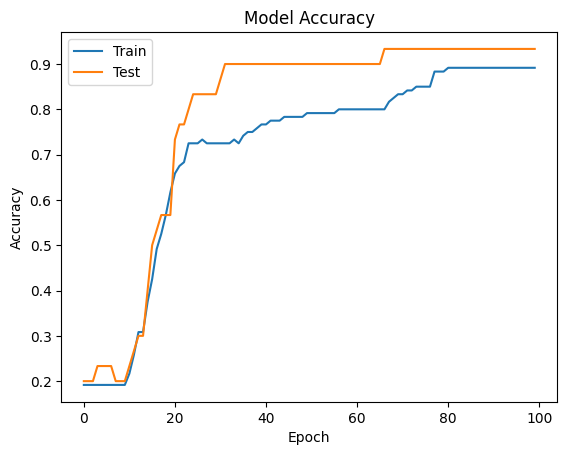

In [39]:
# 학습 곡선 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()